# AAI614: Data Science & its Applications

*Notebook 3.2: Practice with Data Cleaning*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%203/Notebook3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Exercise I. Load the following datafile from GitHub

In [2]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")

In [3]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


In [4]:
print(grads.describe())


       Avg Hours Studies per Week       GPA  Sense of Humour (0-5)
count                    9.000000  8.000000               7.000000
mean                    37.777778  3.112500               2.271429
std                     28.296545  0.716016               1.932800
min                      5.000000  2.000000               0.000000
25%                     20.000000  2.700000               0.850000
50%                     35.000000  3.100000               2.000000
75%                     50.000000  3.625000               3.600000
max                    100.000000  4.000000               5.000000


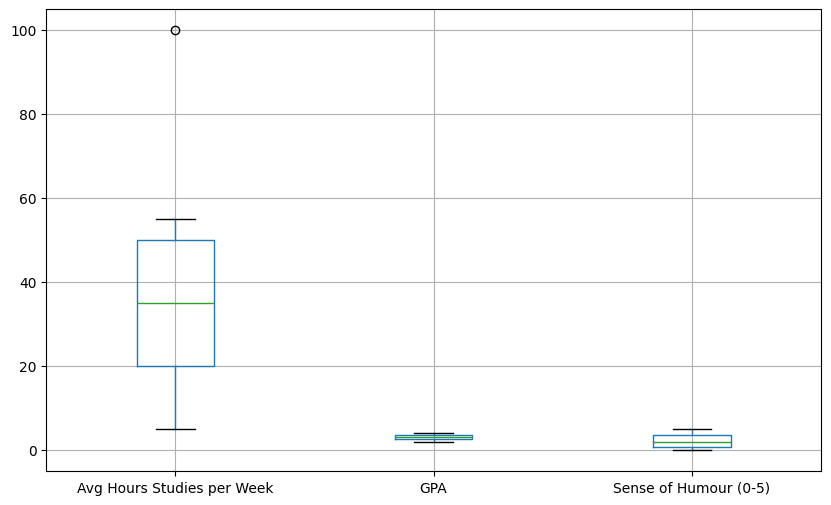

In [8]:
import matplotlib.pyplot as plt

grads.boxplot(figsize=(10, 6))
plt.show()



Question 1: Identify all the outliers in the above data.  Justify your answers using objective measures.

In [11]:
# Calculating Q1, Q3, and IQR for "Avg Hours Studies per Week"
Q1 = grads['Avg Hours Studies per Week'].quantile(0.25)
Q3 = grads['Avg Hours Studies per Week'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers in "Avg Hours Studies per Week"
outliers = grads[(grads['Avg Hours Studies per Week'] < lower_bound) | (grads['Avg Hours Studies per Week'] > upper_bound)]
print(outliers)


  Student Name  Avg Hours Studies per Week  GPA     University  \
6      Estelle                         100  3.2  Festivus Uni    

   Sense of Humour (0-5) Salary  
6                    1.7    $0k  


Question 2: There are various data that are missing.  Fill-in the missing data or delete the rows/columns that you think you should delete.  Justify your answer

Student Name                  0
Avg Hours Studies per Week    0
GPA                           1
University                    0
Sense of Humour (0-5)         2
Salary                        0
dtype: int64


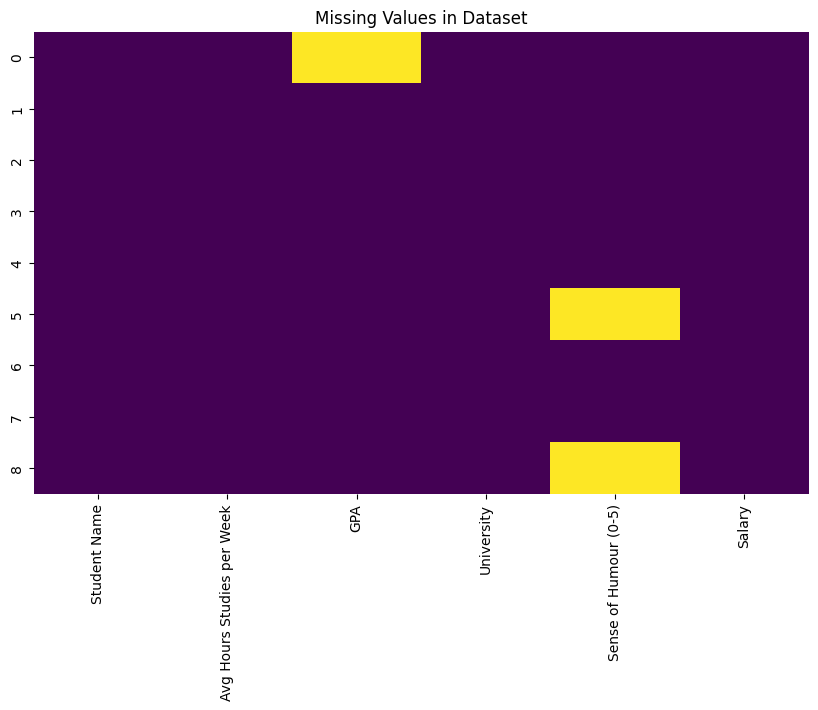

In [13]:
# Check for missing values in each column
print(grads.isnull().sum())

# Alternatively, visualize the missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(grads.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Dataset")
plt.show()


In [14]:
# Fill missing GPA with median
#Since there is only one missing value in "GPA", imputation is a reasonable choice.
#Imputing with the median is generally preferred for numerical data if you want to minimize the effect of outliers, especially if the data is not symmetrically distributed.

grads['GPA'].fillna(grads['GPA'].median(), inplace=True)

# Fill missing University with mode
#University" appears to be a categorical column. Since it has only 1 missing value, the best approach is to fill it with the mode (the most frequent value).
#This ensures consistency by filling in the missing value with the most common university.
grads['University'].fillna(grads['University'].mode()[0], inplace=True)

# Fill missing Sense of Humour (0-5) with median
#"Sense of Humour (0-5)" is also numerical, but it has an ordinal nature (on a scale of 0-5).
#The missing values can be filled using the median to retain the middle-ground, especially since there are only two missing values.
grads['Sense of Humour (0-5)'].fillna(grads['Sense of Humour (0-5)'].median(), inplace=True)


# Check again for missing values
print(grads.isnull().sum())


Student Name                  0
Avg Hours Studies per Week    0
GPA                           0
University                    0
Sense of Humour (0-5)         0
Salary                        0
dtype: int64


<ipython-input-14-e53b5e279287>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grads['GPA'].fillna(grads['GPA'].median(), inplace=True)
<ipython-input-14-e53b5e279287>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

Question 3: Reload the data and fill-in the data using mean method as well as the frequent method.

In [17]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")

In [18]:
# Fill numerical columns with the mean
numerical_columns = grads.select_dtypes(include='number').columns
for column in numerical_columns:
    grads[column].fillna(grads[column].mean(), inplace=True)

# Fill categorical columns with the mode (frequent value)
categorical_columns = grads.select_dtypes(include='object').columns
for column in categorical_columns:
    grads[column].fillna(grads[column].mode()[0], inplace=True)

# Print the updated dataframe to check if missing values are handled
print(grads.isnull().sum())


Student Name                  0
Avg Hours Studies per Week    0
GPA                           0
University                    0
Sense of Humour (0-5)         0
Salary                        0
dtype: int64


<ipython-input-18-59df8c8d9a3b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grads[column].fillna(grads[column].mean(), inplace=True)
<ipython-input-18-59df8c8d9a3b>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

Exercise II. Run the cell below to create a new dataframe called `df_miss`.  Its first column will contain some missing values.

In [19]:
import pandas as pd
import numpy as np
import random

nrows = 10
ncols = 5

# set a seed for random number generation
np.random.seed(314)
# create an array filled with random data
data = np.array(np.random.rand(nrows, ncols))
# put the data to a pandas dataframe
df_miss = pd.DataFrame(data)
# rename the columns
df_miss.columns = ['col_'+str(ii) for ii in range(ncols)]

# randomly set some values to missing
ix0 = np.random.randint(nrows, size=3)
ix1 = np.random.randint(nrows, size=3)

df_miss['col_0'][ix0] = np.nan
df_miss['col_1'][ix1] = np.nan

print(df_miss)

      col_0     col_1     col_2     col_3     col_4
0       NaN       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3       NaN       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5       NaN  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


<ipython-input-19-a77e6ba6a8cb>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_miss['col_0'][ix0] = np.nan
<ipython-input-19-a77e6ba6a8cb>:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting 

Impute the missing values (NaN) in `col_0` (but not `col_1`) with the median.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [20]:
print(df_miss)
print(df_miss.isnull().sum())  # To see the count of missing values in each column


      col_0     col_1     col_2     col_3     col_4
0       NaN       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3       NaN       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5       NaN  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720
col_0    3
col_1    3
col_2    0
col_3    0
col_4    0
dtype: int64


In [21]:
# Impute missing values in 'col_0' with the median
median_value = df_miss['col_0'].median()  # Calculate the median of col_0
df_miss['col_0'].fillna(median_value, inplace=True)  # Fill NaN values with the median

# Print the updated dataframe
print(df_miss)


      col_0     col_1     col_2     col_3     col_4
0  0.677205       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3  0.677205       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5  0.677205  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


<ipython-input-21-20dea53a7053>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_miss['col_0'].fillna(median_value, inplace=True)  # Fill NaN values with the median


Impute the missing values in `col_1` with value 0.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [22]:
# Impute missing values in 'col_1' with the value 0
df_miss['col_1'].fillna(0, inplace=True)

# Print the updated dataframe
print(df_miss)


      col_0     col_1     col_2     col_3     col_4
0  0.677205  0.000000  0.265048  0.783205  0.918001
1  0.827355  0.000000  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3  0.677205  0.000000  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5  0.677205  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


<ipython-input-22-7d6f72a86337>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_miss['col_1'].fillna(0, inplace=True)
